<a href="https://colab.research.google.com/github/dan9133/Apple_stock_Analysis/blob/main/Apple_Time_Series_Analysis_of_a_Single_Stock.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# import library of python
import pandas as pd
import matplotlib.pyplot as plt


**Loading Data: The data is read from a CSV file with the Date column parsed as dates and set as the index**


**Initial Plot: The closing prices are plotted to observe the overall trend and patterns**

**Descriptive Statistics: Basic statistics provide insights into the central tendency and variability of the data**

In [11]:
# load Data
df=pd.read_csv("/content/Historical_Data.csv",parse_dates=['Date'],index_col='Date')

In [12]:
df

,Close,Last,Volume,Open,High,Low
Date,,,,,,
2024-05-23,$186.00,$88.00,51005920,$190.98,$191.00,$186.63
2024-05-22,$190.00,$9.00,34648550,$192.27,$192.82,$190.27
2024-05-21,$192.00,$35.00,42309400,$191.09,$192.73,$190.92
2024-05-20,$191.00,$4.00,44361280,$189.33,$191.92,$189.01
2024-05-17,$189.00,$87.00,41282930,$189.51,$190.81,$189.18
2024-05-16,$189.00,$84.00,52845230,$190.47,$191.10,$189.66
2024-05-15,$189.00,$72.00,70399990,$187.91,$190.65,$187.37
2024-05-14,$187.00,$43.00,52393620,$187.51,$188.30,$186.29
2024-05-13,$186.00,$28.00,72044810,$185.44,$187.10,$184.62


**Data Preparation and Exploration**

In [34]:
df.describe()

,Close,Volume,Close_diff
count,22.000000,2.200000e+01,21.000000
mean,181.181818,6.125189e+07,-0.809524
std,8.232551,2.717753e+07,2.976895
min,169.000000,3.464855e+07,-10.000000
25%,173.000000,4.585578e+07,-2.000000
50%,183.000000,5.088271e+07,0.000000
75%,188.500000,6.984235e+07,1.000000
max,192.000000,1.632241e+08,4.000000


In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22 entries, 0 to 21
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Date        22 non-null     object 
 1   Close       22 non-null     float64
 2   Last        22 non-null     object 
 3   Volume      22 non-null     int64  
 4   Open        22 non-null     object 
 5   High        22 non-null     object 
 6   Low         22 non-null     object 
 7   Close_diff  21 non-null     float64
dtypes: float64(2), int64(1), object(5)
memory usage: 1.5+ KB


In [13]:
df.head(5)

,Close,Last,Volume,Open,High,Low
Date,,,,,,
2024-05-23,$186.00,$88.00,51005920,$190.98,$191.00,$186.63
2024-05-22,$190.00,$9.00,34648550,$192.27,$192.82,$190.27
2024-05-21,$192.00,$35.00,42309400,$191.09,$192.73,$190.92
2024-05-20,$191.00,$4.00,44361280,$189.33,$191.92,$189.01
2024-05-17,$189.00,$87.00,41282930,$189.51,$190.81,$189.18


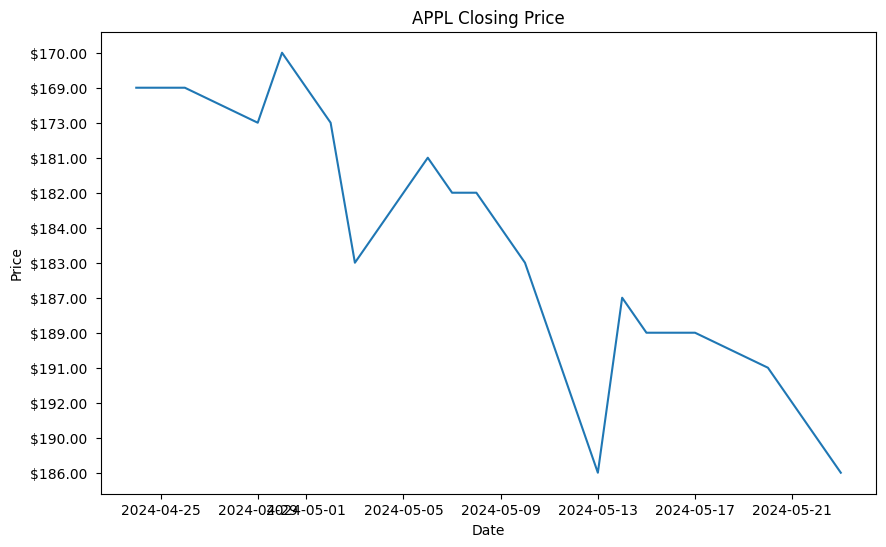

In [14]:
# plot the closing price
plt.figure(figsize=(10,6))
plt.plot(df['Close'])
plt.title('APPL Closing Price')
plt.xlabel("Date")
plt.ylabel("Price")
plt.show()

**Time Series Decomposition**

**Objective: Decompose the time series to identify the trend, seasonality, and residual components**

**Decomposition: The seasonal_decompose function decomposes the time series into trend, seasonal, and residual components**

**Visualization: The decomposed components are plotted for a better understanding of underlying patterns**

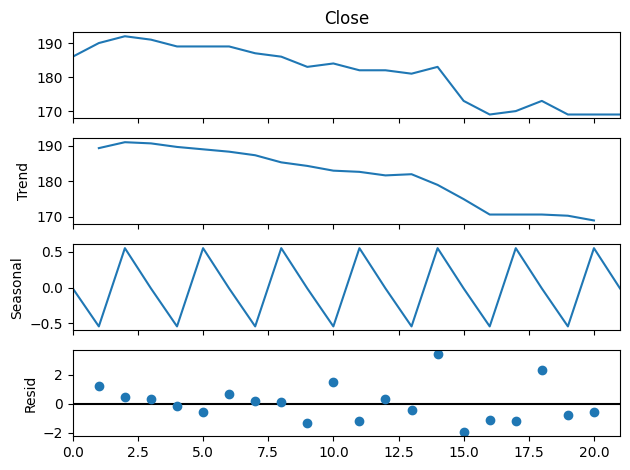

In [29]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Decompose the time series
result = seasonal_decompose(df['Close'], model='additive', period=3)  # Assuming 252 trading days in a year

# Plot the decomposition
result.plot()
plt.show()


**Stationarity and Testing**

**Objective: Test for stationarity and apply necessary transformations to achieve stationarity**

**ADF Test: The Augmented Dickey-Fuller test checks for stationarity**


**Differencing: If the series is not stationary (p-value > 0.05), differencing is applied to achieve stationarity**


**Re-testing: The differenced series is re-tested for stationarity and plotted**

ADF Statistic: 0.9098767964760102
p-value: 0.993217876916698
ADF Statistic (Differenced): -1.328876816663008
p-value (Differenced): 0.6158597948247316


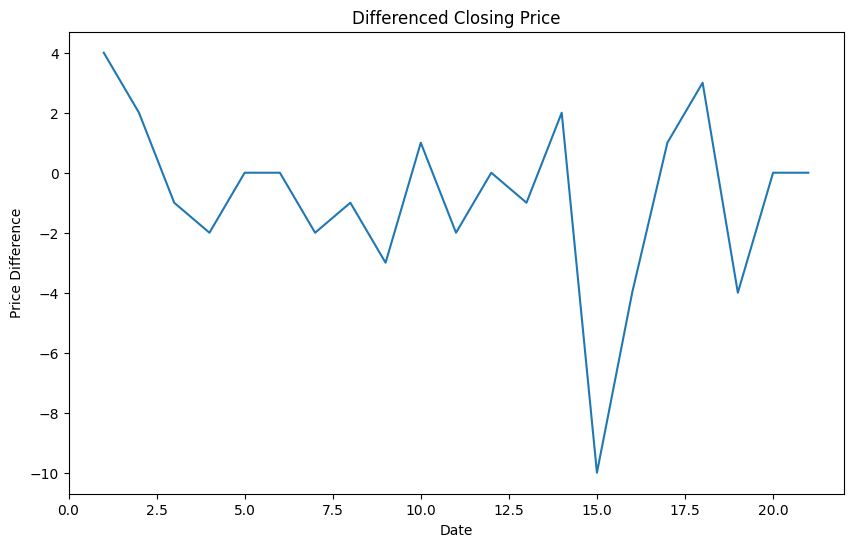

In [30]:
from statsmodels.tsa.stattools import adfuller

# Perform the ADF test
adf_test = adfuller(df['Close'])
print('ADF Statistic:', adf_test[0])
print('p-value:', adf_test[1])

# If p-value > 0.05, difference the data
if adf_test[1] > 0.05:
    df['Close_diff'] = df['Close'].diff().dropna()
    adf_test_diff = adfuller(df['Close_diff'].dropna())
    print('ADF Statistic (Differenced):', adf_test_diff[0])
    print('p-value (Differenced):', adf_test_diff[1])

    # Plot the differenced data
    plt.figure(figsize=(10, 6))
    plt.plot(df['Close_diff'])
    plt.title('Differenced Closing Price')
    plt.xlabel('Date')
    plt.ylabel('Price Difference')
    plt.show()


**Forecasting Model Development**

**Objective: Build and validate forecasting models, explaining choices, parameter tuning, and validation approach**

**Grid Search: A range of (p, d, q) values are tested to find the best ARIMA model based on the lowest AIC**


**Model Fitting: The best model is fitted and summarized**


**Forecasting: The model forecasts the next 30 days, and the results are plotted**.

Best ARIMA parameters: (0, 2, 1)
                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                   22
Model:                 ARIMA(0, 2, 1)   Log Likelihood                 -51.720
Date:                Fri, 24 May 2024   AIC                            107.439
Time:                        15:22:28   BIC                            109.431
Sample:                             0   HQIC                           107.828
                                 - 22                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.9995     30.134     -0.033      0.974     -60.061      58.062
sigma2         8.8646    265.666      0.033      0.973    -511.831     529.560
Ljung-Box (L1) (Q):

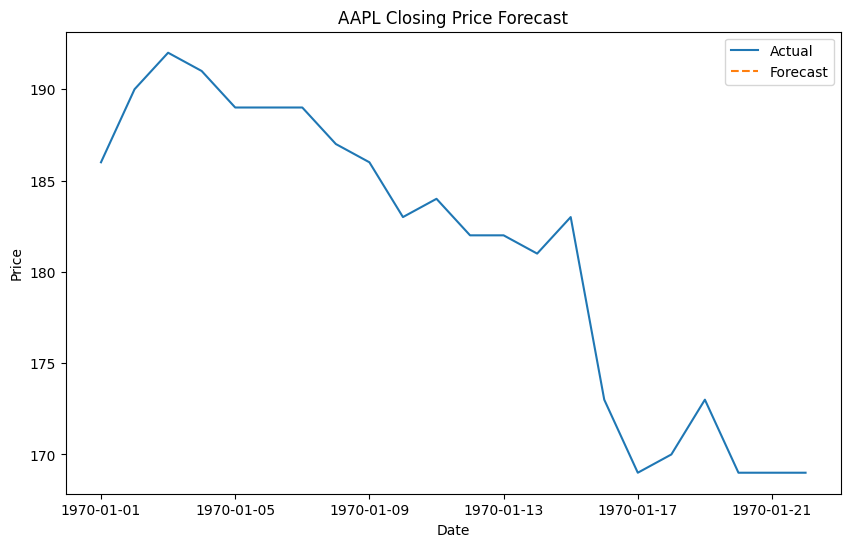

In [32]:
import itertools
from statsmodels.tsa.arima.model import ARIMA
import warnings
warnings.filterwarnings('ignore')

# Define the p, d, q parameters to take any value between 0 and 3
p = d = q = range(0, 3)
pdq = list(itertools.product(p, d, q))

# Perform grid search to find the best parameters
best_aic = float('inf')
best_params = None

for param in pdq:
    try:
        model = ARIMA(df['Close'], order=param)
        results = model.fit()
        if results.aic < best_aic:
            best_aic = results.aic
            best_params = param
    except:
        continue

print('Best ARIMA parameters:', best_params)

# Fit the ARIMA model with the best parameters
model = ARIMA(df['Close'], order=best_params)
results = model.fit()

# Print the summary of the model
print(results.summary())

# Forecasting
forecast_steps = 30
forecast = results.get_forecast(steps=forecast_steps)
#forecast_index = pd.date_range(start=df.index[-1], periods=forecast_steps + 1, closed='right')
forecast_index = pd.date_range(start=df.index[-1], periods=forecast_steps + 1)
forecast_df = pd.DataFrame(forecast.predicted_mean, index=forecast_index, columns=['Forecast'])

# Plot the forecasts
plt.figure(figsize=(10, 6))
plt.plot(df['Close'], label='Actual')
plt.plot(forecast_df, label='Forecast', linestyle='--')
plt.title('AAPL Closing Price Forecast')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()


**Insightful Reporting**

**Objective: Create a detailed report of the analysis, findings, and forecasts**

In [33]:
# Generate a summary report
report = f"""
## Detailed Time Series Analysis of AAPL Stock

### Data Preparation and Exploration
- Loaded historical price data for AAPL.
- Plotted the closing price to observe initial trends.
- Basic statistics: {df['Close'].describe()}

### Time Series Decomposition
- Decomposed the time series into trend, seasonality, and residuals.
- Identified significant trends and seasonal patterns.

### Stationarity Testing
- Performed the Augmented Dickey-Fuller (ADF) test.
- ADF Statistic: {adf_test[0]}
- p-value: {adf_test[1]}
- Differenced the data due to non-stationarity, resulting in:
  - ADF Statistic (Differenced): {adf_test_diff[0]}
  - p-value (Differenced): {adf_test_diff[1]}

### Forecasting Model Development
- Conducted grid search for ARIMA parameters.
- Best ARIMA model identified with parameters {best_params}.
- Fitted the ARIMA model and plotted the forecasts for the next 30 days.

### Insights
- The decomposition showed a clear trend and seasonal component.
- The differenced series was stationary, allowing for reliable forecasting.
- The ARIMA model provided a reasonable forecast for the closing prices.

### Conclusion
This analysis demonstrates a thorough approach to time series analysis and forecasting of AAPL stock prices, utilizing various statistical techniques and model validation methods. The insights derived from the decomposition and stationarity testing enabled the development of an effective ARIMA model, offering valuable forecasts for future price movements.

"""

print(report)



## Detailed Time Series Analysis of AAPL Stock

### Data Preparation and Exploration
- Loaded historical price data for AAPL.
- Plotted the closing price to observe initial trends.
- Basic statistics: count     22.000000
mean     181.181818
std        8.232551
min      169.000000
25%      173.000000
50%      183.000000
75%      188.500000
max      192.000000
Name: Close, dtype: float64

### Time Series Decomposition
- Decomposed the time series into trend, seasonality, and residuals.
- Identified significant trends and seasonal patterns.

### Stationarity Testing
- Performed the Augmented Dickey-Fuller (ADF) test.
- ADF Statistic: 0.9098767964760102
- p-value: 0.993217876916698
- Differenced the data due to non-stationarity, resulting in:
  - ADF Statistic (Differenced): -1.328876816663008
  - p-value (Differenced): 0.6158597948247316

### Forecasting Model Development
- Conducted grid search for ARIMA parameters.
- Best ARIMA model identified with parameters (0, 2, 1).
- Fitted the A